Best Response Sequences in the Iterated Prisoner's Dilemma
------------

This Chapter explores best response strategies, to a collection of opponents, in the form of sequences. The APL project is used to simulate matches between these opponents and the "sequence" players. Morespecifically, the class `Cycler` is used to simulate the sequences.

In [1]:
import axelrod as axl

**Example of $S = \{D, D, D, C, C, C, D, D, C, C\}$ against Cooperator**

In [2]:
players = [axl.Cycler("DDDCCCDDCC"), axl.Cooperator()]

In [3]:
match = axl.Match(players, turns=10)
match.play()

[(D, C),
 (D, C),
 (D, C),
 (C, C),
 (C, C),
 (C, C),
 (D, C),
 (D, C),
 (C, C),
 (C, C)]

In [4]:
match.final_score_per_turn()

(4.0, 1.5)

**Example of $S = \{D, D, D, C, C, C, D, D, C, C\}$ against Tit For Tat**

In [5]:
players = [axl.Cycler("DDDCCCDDCC"), axl.TitForTat()]

In [6]:
match = axl.Match(players, turns=10)
match.play()

[(D, C),
 (D, D),
 (D, D),
 (C, D),
 (C, C),
 (C, C),
 (D, C),
 (D, D),
 (C, D),
 (C, C)]

In [7]:
match.final_score_per_turn()

(2.2, 2.2)

**Example against Random**

In [8]:
players = [axl.Random(), axl.Cycler("DDDCCCDDCC")]

In [9]:
axl.seed(1)
match = axl.Match(players, turns=10)
actions = match.play()

In [10]:
actions

[(C, D),
 (D, D),
 (D, D),
 (C, C),
 (C, C),
 (C, C),
 (D, D),
 (D, D),
 (C, C),
 (C, C)]

In [11]:
match.final_score_per_turn()

(1.9, 2.4)

In [12]:
axl.seed(2)
match = axl.Match(players, turns=10)
actions = match.play()

In [13]:
match.final_score_per_turn()

(2.6, 1.6)

This work uses random seeds to capture different behaviours of stochastic strategies. Random seeding also makes it possible to reproduce the behaviour of stochastic strategies.

In [14]:
players = [axl.Cycler("DDDCCCDDCC"), axl.Random()]
for seed in range(5):
    axl.seed(seed)
    match = axl.Match(players, turns=10)
    actions = match.play()
    print(actions, match.final_score_per_turn())
    print(
        "================================================================================"
    )

[(D, D), (D, D), (D, C), (C, C), (C, D), (C, C), (D, D), (D, C), (C, C), (C, D)] (2.2, 2.2)
[(D, C), (D, D), (D, D), (C, C), (C, C), (C, C), (D, D), (D, D), (C, C), (C, C)] (2.4, 1.9)
[(D, D), (D, D), (D, C), (C, C), (C, D), (C, D), (D, D), (D, C), (C, D), (C, D)] (1.6, 2.6)
[(D, C), (D, D), (D, C), (C, D), (C, D), (C, C), (D, C), (D, D), (C, C), (C, C)] (2.6, 2.1)
[(D, C), (D, C), (D, C), (C, C), (C, C), (C, C), (D, D), (D, D), (C, D), (C, C)] (2.9, 1.9)


`sequence_sensei` is a package which has been developed to perform a genetic algorithm on sequences.

In [15]:
import sequence_sensei as ss
import numpy as np

Generating the starting population is done using the following code:

In [16]:
initial_population = ss.get_initial_population(
    half_size_of_population=5, sequence_length=8
)

In [17]:
np.matrix(initial_population)

matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
np.matrix([[axl.Action(gene) for gene in member] for member in initial_population])

matrix([[C, D, D, D, D, D, D, D],
        [D, C, C, C, C, C, C, C],
        [C, C, D, D, D, D, D, D],
        [D, D, C, C, C, C, C, C],
        [C, C, C, C, D, D, D, D],
        [D, D, D, D, C, C, C, C],
        [C, C, C, C, C, C, D, D],
        [D, D, D, D, D, D, C, C],
        [C, C, C, C, C, C, C, C],
        [D, D, D, D, D, D, D, D]], dtype=object)

`sequence_sensei` includes functions for the crossover and mutation properties of a genetic algorithm.

In [19]:
import random
import sequence_sensei as ss

In [20]:
turns = 10

cooperator = [1 for _ in range(turns)]
alternator = [i % 2 for i in range(turns)]

In [21]:
random.seed(0)
new_member = ss.crossover(cooperator, alternator)

In [22]:
new_member

[1, 1, 1, 1, 1, 1, 0, 1, 0, 1]

In [23]:
random.seed(1)
[ss.mutation(gene, mutation_probability=0.05) for gene in new_member]

[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]

In [24]:
random.seed(1)
[round(random.random(), 3) for gene in new_member]

[0.134, 0.847, 0.764, 0.255, 0.495, 0.449, 0.652, 0.789, 0.094, 0.028]

**Genetic Algorithm Analysis**

In [25]:
import json

from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [26]:
font = {"size": 11, "weight": "bold"}
mpl.rc("font", **font)

**Tables**

The raw data need to be download to carry out the following analysis. We will read in a few exported summaries and export latex table to demostrate the format of the exported summaries. 

In [27]:
columns = [
    "opponent",
    "seed",
    "bottleneck",
    "mutation probability",
    "half size population",
    "generation",
    "index",
    "score",
    "gene_0",
    "gene_1",
    "gene_202",
    "gene_203",
    "gene_204",
]

labels = {
    "bottleneck": "$b$",
    "mutation probability": "$p_m$",
    "half size population": "$K/2$",
    "generation": "$G_i$",
}

An example of a stochastic player.

In [ ]:
champion = pd.read_csv("/Volumes/ext/Data/raw_data/Champion_9/main.csv")

In [53]:
with open("tex/champion_seed_nine_table.tex", "w") as file:
    table = champion.iloc[np.r_[0:5, -5:0]][columns]
    table = table.rename(columns=labels)
    file.write(table.to_latex().replace("\_", " "))

An example of a deterministic players.

In [34]:
alternator = pd.read_csv("/Volumes/ext/Data/raw_data/Alternator_nan/main.csv")

In [54]:
with open("tex/alternator_table.tex", "w") as file:
    table = alternator.iloc[np.r_[0:5, -5:0]][columns]
    table = table.rename(columns=labels)
    file.write(table.to_latex().replace("\_", " "))

In [56]:
champion_four = pd.read_csv("/Volumes/ext/Data/raw_data/Champion_4/main.csv")

**Accuracy**

The accuracy of the stochastic players sequences.

In [161]:
with open("checks.txt") as json_file:
    data = json.load(json_file)

In [162]:
len(data)

2309

In [176]:
reproducible = int(round(sum(data.values()) / len(data), 2) * 100)

In [177]:
with open("tex/reproducible_percentage.tex", "w") as file:
    file.write(str(reproducible) + "\%")

In [178]:
with open("tex/non_reproducible_percentage.tex", "w") as file:
    file.write(str(round(100 - reproducible, 2)) + "\%")

**Successfully captured best responses**

In [66]:
columns_for_table = ["opponent", "score"] + [f"gene_{i}" for i in range(205)]
genes = [f"gene_{i}" for i in range(205)]

In [45]:
strategies_names = [
    "Cooperator_nan",
    "Alternator_nan",
    "Cycler CCCCCD_nan",
    "Cycler CCCD_nan",
    "Cycler CCCDCD_nan",
    "Cycler CCD_nan",
    "Cycler DC_nan",
    "Cycler DDC_nan",
    "Defector_nan",
]

In [46]:
dfs = []
for name in strategies_names:
    df = pd.read_csv(f"/Volumes/ext/Data/raw_data/{name}/main.csv")
    dfs.append(df)

In [61]:
rows = []
for df in dfs:
    rows.append(
        df[(df["generation"] == 2000) & (df["score"] == df["score"].max())][
            columns_for_table
        ].iloc[0]
    )

In [73]:
columns_to_write = ["opponent", "score"] + [
    f"gene_{i}" for i in [0, 1, 2, 3, 4, 5, 200, 201, 202, 203, 204]
]

In [79]:
with open("tex/always_defect_best_responses.tex", "w") as file:
    file.write(
        pd.DataFrame(rows)[columns_to_write].round(3).to_latex().replace("\_", " ")
    )

In [157]:
strategies_names = ["Tit For Tat_nan", "Grudger_nan", "Hard Tit For Tat_nan"]

In [158]:
dfs = []
for name in strategies_names:
    df = pd.read_csv(f"/Volumes/ext/Data/raw_data/{name}/main.csv")
    dfs.append(df)

In [159]:
rows = []
for i, df in enumerate(dfs):
    rows.append(
        df[(df["generation"] == 2000) & (df["score"] == df["score"].max())][
            columns_for_table
        ].iloc[0]
    )

In [160]:
with open("tex/known_strategies_best_responses.tex", "w") as file:
    file.write(
        pd.DataFrame(rows)[columns_to_write].round(3).to_latex().replace("\_", " ")
    )

In [135]:
tf1 = pd.read_csv("/Volumes/ext/Data/raw_data/TF1_nan/main.csv")

In [144]:
row = [
    tf1[(tf1["generation"] == 2000) & (tf1["score"] == tf1["score"].max())][
        columns_for_table
    ].iloc[0]
]

In [146]:
with open("tex/hand_shake_best_response.tex", "w") as file:
    file.write(
        pd.DataFrame(row)
        .reset_index()[columns_to_write]
        .round(3)
        .to_latex()
        .replace("\_", " ")
    )

**Genetic algorithm converging examples**

Tit for Tat. A deterministic strategy that we know the best response to.

In [8]:
tft = pd.read_csv("/Volumes/ext/Data/raw_data/Tit For Tat_nan/main.csv")

In [ ]:
tft_scores = tft.groupby(
    ["half size population", "bottleneck", "mutation probability", "generation"]
)["score"].max()

Grudger.

In [ ]:
grudger = pd.read_csv("/Volumes/ext/Data/raw_data/Grudger_nan/main.csv")

In [ ]:
grudger_scores = pavlov.groupby(
    ["half size population", "bottleneck", "mutation probability", "generation"]
)["score"].max()

Aggravater.

In [ ]:
aggravater = pd.read_csv("/Volumes/ext/Data/raw_data/Aggravater_nan/main.csv")
aggravater_scores = aggravater.groupby(
    ["half size population", "bottleneck", "mutation probability", "generation"]
)["score"].max()

Evolved FSM 16.

In [136]:
trained = pd.read_csv("/Volumes/ext/Data/raw_data/Evolved FSM 16_nan/main.csv")

In [137]:
trained_scores = trained.groupby(
    ["half size population", "bottleneck", "mutation probability", "generation"]
)["score"].max()

Preparation to plot.

In [126]:
indices = list(
    tft.groupby(["half size population", "bottleneck", "mutation probability"])["score"]
    .max()
    .index
)
to_plot = [index for index in indices if tft_scores[index].max() != 3.0]
to_plot += [
    (10, 10, 0.05),
    (15, 10, 0.05),
    (10, 20, 0.05),
    (15, 10, 0.1),
]

In [178]:
linestyles = [":", "-.", "--", "-", "-", ":", "-.", "--", "-", "-"]

In [123]:
colors = mpl.cm.inferno(np.linspace(0, 1, 10))

In [113]:
titles = [
    r"$Q$ = Tit For Tat",
    r"$Q$ = Grudger",
    r"$Q$ = Evolved FSM 16",
    r"$Q$ = Aggravater",
]

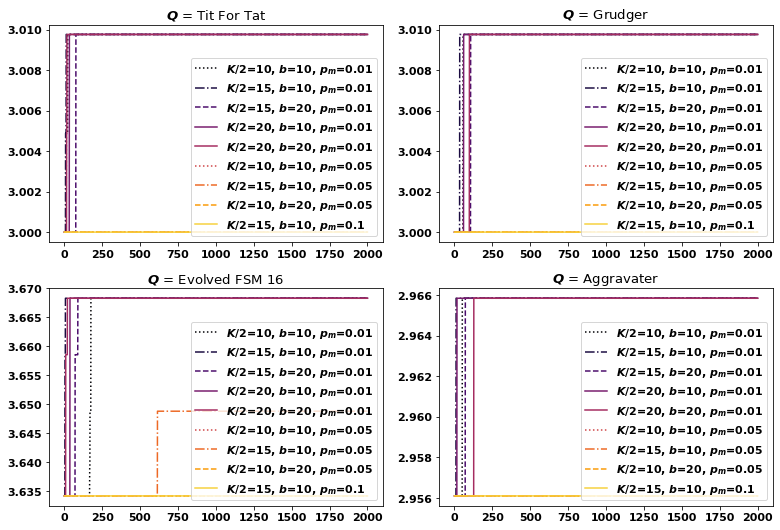

In [156]:
scores = [tft_scores, grudger_scores, trained_scores, aggravater_scores]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(11, 7.5))
for i, score in enumerate(scores):
    axes = (int(i / 2), i % 2)
    for j, index in enumerate(to_plot):
        ax[axes].plot(
            score[index],
            linestyles[j],
            label=f"$K/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}",
            color=colors[j],
        )
        ax[axes].legend(loc="lower right")
        ax[axes].set_title(titles[i])
plt.tight_layout()

plt.savefig("img/gas_results_per_trial.pdf", bbox_inches="tight")

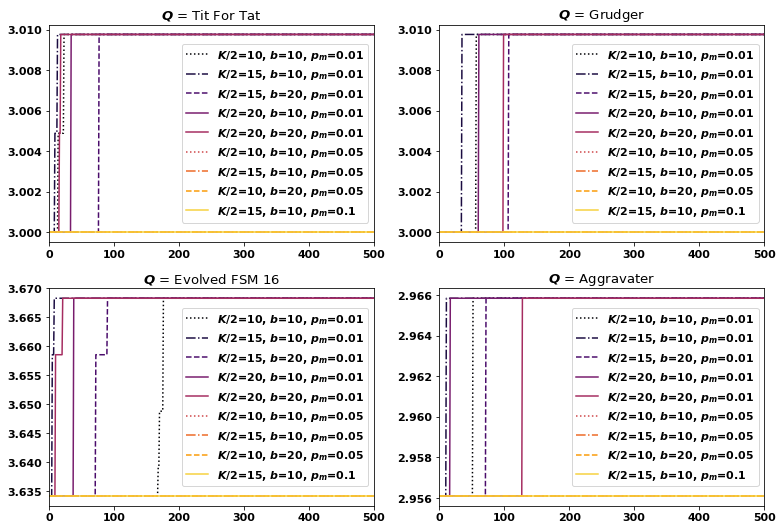

In [154]:
scores = [tft_scores, grudger_scores, trained_scores, aggravater_scores]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(11, 7.5))
for i, score in enumerate(scores):
    axes = (int(i / 2), i % 2)
    for j, index in enumerate(to_plot):
        ax[axes].plot(
            score[index],
            linestyles[j],
            label=f"$K/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}",
            color=colors[j],
        )
        ax[axes].legend()
        ax[axes].set_title(titles[i])
        ax[axes].set_xlim(0, 500)
plt.tight_layout()

plt.savefig("img/gas_results_per_trial_to_generation_500.pdf", bbox_inches="tight")

The best response sequences to Adaptive.

In [80]:
adaptive = pd.read_csv("/Volumes/ext/Data/raw_data/Adaptive_nan/main.csv")

In [310]:
last_generation_adaptive = adaptive[adaptive["generation"] == 2000]

In [313]:
genes = ["gene_{}".format(i) for i in range(205)]

subset = [f"gene_{i}" for i in [0, 1, 2, 3, 4, 5, 6, 202, 203, 204]]

last_generation_adaptive[last_generation_adaptive["score"] == 4.882926829268293][
    genes
].drop_duplicates()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_195,gene_196,gene_197,gene_198,gene_199,gene_200,gene_201,gene_202,gene_203,gene_204
40000,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300120,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480210,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
with open("tex/best_responses_adaptive_table.tex", "w") as file:
    table = (
        last_generation_adaptive[
            last_generation_adaptive["score"] == 4.882926829268293
        ][genes]
        .drop_duplicates()[subset]
        .reset_index()
    )

    file.write(table.to_latex().replace("\_", " "))

Champion. A stochastic strategy were the final best response sequence is accurate.

In [158]:
champion = pd.read_csv("/Volumes/ext/Data/raw_data/Champion_9/main.csv")

In [184]:
champion_last_gen = champion[champion["generation"] == 2000]
champion_last_gen["score"].max()

3.819512195121951

In [161]:
champion_scores = champion.groupby(
    ["half size population", "bottleneck", "mutation probability", "generation"]
)["score"].max()

In [172]:
indices = [
    (10, 10, 0.01),
    (15, 10, 0.01),
    (15, 20, 0.01),
    (20, 10, 0.01),
    (20, 20, 0.01),
]

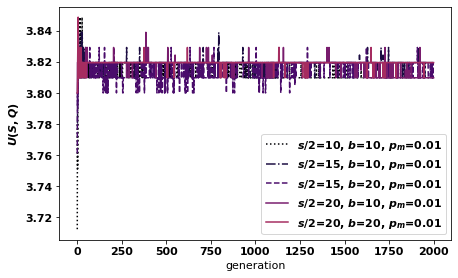

In [180]:
fig, ax = plt.subplots(figsize=(6.5, 4))

for i, index in enumerate(indices):
    plt.plot(
        champion_scores[index],
        linestyles[i],
        label=f"$s/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}",
        color=colors[i],
    )

plt.legend()
plt.ylabel(r"$U(S, Q)$")
plt.xlabel("generation")

plt.tight_layout()

plt.savefig("img/maximum_score_per_generation_champion.pdf")

Random. A stochastic strategies were multiple errors occured during the data collection.

In [185]:
random = pd.read_csv("/Volumes/ext/Data/raw_data/Random_1/main.csv")

In [186]:
random_last_generation = random[random["generation"] == 2000]

In [217]:
scores = random.groupby(
    ["half size population", "bottleneck", "mutation probability", "generation"]
)["score"].max()

In [206]:
val_bottleneck = 10
val_mutation = 0.01
val_half_size_population = 20

In [208]:
trial = random[
    (random["bottleneck"] == val_bottleneck)
    & (random["mutation probability"] == val_mutation)
    & (random["half size population"] == val_half_size_population)
]

In [209]:
genes = ["gene_{}".format(i) for i in range(205)]

In [210]:
actual_scores = []
for g in range(2001):
    score = trial[trial["generation"] == g]["score"].max()

    generation_scores = []
    for i, row in trial[
        (trial["generation"] == g) & (trial["score"] == score)
    ].iterrows():
        axl.seed(2)
        match = axl.Match(
            [axl.Cycler(ss.get_sequence_str(row[genes])), axl.Random()], turns=205
        )
        _ = match.play()

        generation_scores.append(match.final_score_per_turn()[0])
    actual_scores.append(max(generation_scores))

In [215]:
indices = [(val_half_size_population, val_bottleneck, val_mutation)]

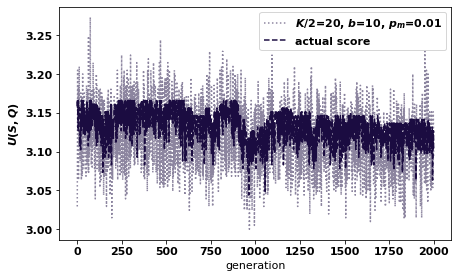

In [220]:
fig, ax = plt.subplots(figsize=(6.5, 4))

for i, index in enumerate(indices):
    plt.plot(
        scores[index],
        ":",
        label=f"$K/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}",
        color=colors[1],
        alpha=0.5,
    )
    plt.plot(actual_scores, "--", color=colors[1], label="actual score")
plt.legend()

plt.ylabel(r"$U(S, Q)$")
plt.xlabel("generation")


plt.tight_layout()
plt.savefig("img/maximum_score_per_generation_random.pdf")